In [1]:
# Some useful settings for interactive work
%load_ext autoreload
%autoreload 2
%matplotlib widget

In [2]:
import plotters as pt
import os 
import pickle
import numpy as np
import transformers as tf



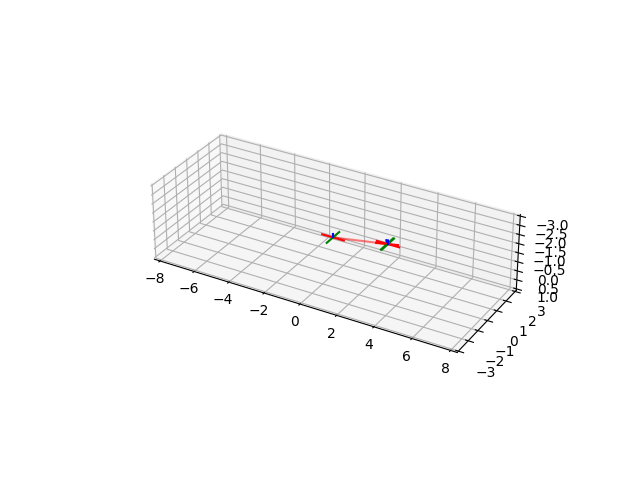

In [3]:
data_path = os.path.join("data","ascend"+".pkl")

# Load Flight Data
with open(data_path,'rb') as file:
    idl_data = pickle.load(file)

Ti:np.ndarray   = idl_data['Ti']
FOi:np.ndarray  = idl_data['FOi'] #ask more data 10,000 more the better duplicate trajectories
tXUi:np.ndarray = idl_data['tXUi']
Ci:np.ndarray   = idl_data['Ci']

pt.tXU_to_3D([tXUi])

In [4]:
print("Ti (first 5 entries):", Ti[:5])
print("FOi (first 5 entries):", FOi[:5])
print("tXUi (first 5 entries):", tXUi[:5])
print("Ci (first 5 entries):", Ci[:5])


Ti (first 5 entries): [0.    0.005 0.01  0.015 0.02 ]
FOi (first 5 entries): [[[-7.85304432e-08 -1.10725772e-07 -3.37095344e-08 -1.50306686e-07
    3.10459506e+01 -1.23494508e+02  2.00253226e+02 -1.03822200e+02
   -1.11992149e+02  2.42301746e+02 -3.19639958e+02  1.96666868e+02]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [-9.99691994e-01  2.87610334e-08  3.06035762e-09  1.52245551e-08
   -5.17432508e+00  2.05824180e+01 -3.33755376e+01  1.73037003e+01
    1.86653572e+01 -4.03836226e+01  5.32733241e+01 -3.27778099e+01]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]

 [[-7.82792199e-08  5.32683648e-07  3.85472331e-04  1.53690091e-01
    3.04309791e+01 -1.22494542e+02  1.99732720

In [5]:
# Extract x position data from FOi
x_positions_FOi = FOi[:, 0, 0]


In [6]:
import numpy as np
# Parameters for noise injection
noise_level = 5e-5  # Adjust based on your data's scale
desired_size = 10000  # Total desired number of data points

# Initialize the synthetic dataset with the original data
synthetic_data = np.copy(x_positions_FOi)

# Generate synthetic data points until reaching the desired size
while len(synthetic_data) < desired_size:
    # Iterate through the original data in order
    for base_point in x_positions_FOi:
        # Check if adding another point would exceed the desired size
        if len(synthetic_data) >= desired_size:
            break  # Stop if we have reached or exceeded the desired size
        
        # Generate a new point by adding Gaussian noise to the base point
        new_point = base_point + np.random.normal(0, noise_level)
        
        # Append the new point to the synthetic dataset
        synthetic_data = np.append(synthetic_data, new_point)

# Now synthetic_data contains the original points plus the newly generated ones, totaling around 10,000


In [7]:

# Prepare dataset for supervised learning
X_FOi = synthetic_data[:-1]  # Current x positions
y_FOi = synthetic_data[1:]   # Next x positions

# Manually split the dataset into training, validation, and test sets
# Shuffle the dataset indices
indices_FOi = np.arange(X_FOi.shape[0])
np.random.shuffle(indices_FOi)

# Determine split sizes based on the corrected dataset size
train_size_FOi = int(0.8 * len(indices_FOi))  # 80% for training
val_size_FOi = int(0.1 * len(indices_FOi))    # 10% for validation
test_size_FOi = len(indices_FOi) - train_size_FOi - val_size_FOi  # The remaining 10% for testing

# Split the dataset indices
train_indices_FOi = indices_FOi[:train_size_FOi]
val_indices_FOi = indices_FOi[train_size_FOi:train_size_FOi + val_size_FOi]
test_indices_FOi = indices_FOi[train_size_FOi + val_size_FOi:]

# Extract the dataset splits using the indices
X_train_FOi = X_FOi[train_indices_FOi]
y_train_FOi = y_FOi[train_indices_FOi]

X_val_FOi = X_FOi[val_indices_FOi]
y_val_FOi = y_FOi[val_indices_FOi]

X_test_FOi = X_FOi[test_indices_FOi]
y_test_FOi = y_FOi[test_indices_FOi]

# Output the shapes of the splits to confirm the process
X_train_FOi.shape, X_val_FOi.shape, X_test_FOi.shape,y_train_FOi.shape, y_val_FOi.shape, y_test_FOi.shape

((7999,), (999,), (1001,), (7999,), (999,), (1001,))

In [8]:
print("Min value in X_train_FOi:", np.min(x_positions_FOi))
print("Max value in X_train_FOi:", np.max(x_positions_FOi))
print(x_positions_FOi)


Min value in X_train_FOi: -7.853044322293487e-08
Max value in X_train_FOi: 2.9991701989815738
[-7.85304432e-08 -7.82792199e-08 -6.68062329e-08 -1.54859788e-08
  1.22945690e-07  4.14013440e-07  9.41127437e-07  1.80521142e-06
  3.12433386e-06  5.03334223e-06  7.68350026e-06  1.12421284e-05
  1.58922471e-05  2.18322236e-05  2.92754209e-05  3.84498510e-05
  4.95978298e-05  6.29756362e-05  7.88531733e-05  9.75136331e-05
  1.19253164e-04  1.44380542e-04  1.73216843e-04  2.06095120e-04
  2.43360081e-04  2.85367776e-04  3.32485277e-04  3.85090367e-04
  4.43571234e-04  5.08326164e-04  5.79763234e-04  6.58300020e-04
  7.44363289e-04  8.38388716e-04  9.40820582e-04  1.05211149e-03
  1.17272209e-03  1.30312076e-03  1.44378339e-03  1.59519301e-03
  1.75783963e-03  1.93221988e-03  2.11883675e-03  2.31819938e-03
  2.53082274e-03  2.75722740e-03  2.99793925e-03  3.25348926e-03
  3.52441322e-03  3.81125150e-03  4.11454880e-03  4.43485389e-03
  4.77271939e-03  5.12870151e-03  5.50335983e-03  5.89725707e

In [9]:
import numpy as np

def normalize_data(data, feature_range=(0, 1)):
    """
    Normalize data to a specified range.

    Parameters:
    - data: Data to be normalized (numpy array).
    - feature_range: Tuple (min, max) specifying the range of the normalized data.

    Returns:
    - normalized_data: Normalized data.
    """
    min_val, max_val = feature_range
    data_min = np.min(data)
    data_max = np.max(data)
    # Scale data to [0,1]
    normalized_data = (data - data_min) / (data_max - data_min)
    # Scale data to feature_range
    normalized_data = normalized_data * (max_val - min_val) + min_val
    return normalized_data

# Assuming X_data and Y_data are your data arrays
# Normalize X_data and Y_data

# Use distinct token values


# Then proceed with your segmentation or other processing steps


In [10]:
import numpy as np

Xtr_data_normalized = normalize_data(np.array(X_train_FOi))
Ytr_data_normalized = normalize_data(np.array(y_train_FOi))
Xv_data_normalized = normalize_data(np.array(X_val_FOi))
Yv_data_normalized = normalize_data(np.array(y_val_FOi))
Xte_data_normalized = normalize_data(np.array(X_test_FOi))
Yte_data_normalized = normalize_data(np.array(y_test_FOi))

# Scale to an integer range, e.g., [0, 10000]
xtrint_data = np.round(Xtr_data_normalized * 10000).astype(np.int64)
ytrint_data = np.round(Ytr_data_normalized * 10000).astype(np.int64)
xvint_data = np.round(Xv_data_normalized * 10000).astype(np.int64)
yvint_data = np.round(Yv_data_normalized * 10000).astype(np.int64)
xteint_data = np.round(Xte_data_normalized * 10000).astype(np.int64)
yteint_data = np.round(Yte_data_normalized * 10000).astype(np.int64)

# Choose SOS and EOS tokens
SOS_token = 10001  # Start of sequence token
EOS_token = 10002  # End of sequence token


In [11]:
import numpy as np

def segment_data(X, Y, length=8, SOS_token=10001, EOS_token=10002):
    """
    Segments the given X and Y arrays into sequences of the specified length,
    including SOS and EOS tokens at the beginning and end of each sequence.
    Each sequence overlaps with the next, where the last element of one sequence
    is the first element of the next.

    Parameters:
    - X: Input data array
    - Y: Target data array
    - length: The length of each segmented sequence (default: 8)
    - SOS_token: Start of sequence token (default: -1) -this token should change it's value it could mess data
    - EOS_token: End of sequence token (default: 10001) -this token should change it's value it could mess data

    Returns:
    - A list of segmented data pairs [segmented_X, segmented_Y] with SOS and EOS tokens
    """
    data = []
    X = np.array(X)
    Y = np.array(Y)

    for i in range(len(X) - length + 1):
        X_segment = X[i:i + length]
        Y_segment = Y[i:i + length]
        
        # Print original segments before adding tokens
        print(f'Original X_segment[{i}]: {X_segment}')
        print(f'Original Y_segment[{i}]: {Y_segment}')
        
        # Insert SOS at the beginning and EOS at the end of each segment
        X_segment = np.insert(X_segment, 0, SOS_token)
        Y_segment = np.insert(Y_segment, 0, SOS_token)
        X_segment = np.append(X_segment, EOS_token)
        Y_segment = np.append(Y_segment, EOS_token)
        
        # Print segments after adding tokens
        print(f'With Tokens X_segment[{i}]: {X_segment}')
        print(f'With Tokens Y_segment[{i}]: {Y_segment}')

        data.append([X_segment, Y_segment])

    np.random.shuffle(data)
    return data

# Example usage with your data:
X_data = xtrint_data  # Your X_train data here
Y_data = ytrint_data #Your Y_train data here

train_segmented_data = segment_data(X_data, Y_data, length=8)
for pair in train_segmented_data[:5]:  # Print the first 5 pairs to check
    print(f'X: {pair[0]}, Y: {pair[1]}')


Original X_segment[0]: [ 1075  4491   210  3918  7293  1971 10000  2491]
Original Y_segment[0]: [1095 4528  217 3953 7325 1999 9999 2522]
With Tokens X_segment[0]: [10001  1075  4491   210  3918  7293  1971 10000  2491 10002]
With Tokens Y_segment[0]: [10001  1095  4528   217  3953  7325  1999  9999  2522 10002]
Original X_segment[1]: [ 4491   210  3918  7293  1971 10000  2491   438]
Original Y_segment[1]: [4528  217 3953 7325 1999 9999 2522  450]
With Tokens X_segment[1]: [10001  4491   210  3918  7293  1971 10000  2491   438 10002]
With Tokens Y_segment[1]: [10001  4528   217  3953  7325  1999  9999  2522   450 10002]
Original X_segment[2]: [  210  3918  7293  1971 10000  2491   438  6294]
Original Y_segment[2]: [ 217 3953 7325 1999 9999 2522  450 6329]
With Tokens X_segment[2]: [10001   210  3918  7293  1971 10000  2491   438  6294 10002]
With Tokens Y_segment[2]: [10001   217  3953  7325  1999  9999  2522   450  6329 10002]
Original X_segment[3]: [ 3918  7293  1971 10000  2491   43

In [12]:
val_segmented_data = segment_data(xvint_data, yvint_data, length=8)

Original X_segment[0]: [ 224 8084 7719 9956 9954 5799 4528    0]
Original Y_segment[0]: [ 232 8110 7747 9959 9957 5835 4563    1]
With Tokens X_segment[0]: [10001   224  8084  7719  9956  9954  5799  4528     0 10002]
With Tokens Y_segment[0]: [10001   232  8110  7747  9959  9957  5835  4563     1 10002]
Original X_segment[1]: [8084 7719 9956 9954 5799 4528    0 7891]
Original Y_segment[1]: [8110 7747 9959 9957 5835 4563    1 7919]
With Tokens X_segment[1]: [10001  8084  7719  9956  9954  5799  4528     0  7891 10002]
With Tokens Y_segment[1]: [10001  8110  7747  9959  9957  5835  4563     1  7919 10002]
Original X_segment[2]: [7719 9956 9954 5799 4528    0 7891 9279]
Original Y_segment[2]: [7747 9959 9957 5835 4563    1 7919 9295]
With Tokens X_segment[2]: [10001  7719  9956  9954  5799  4528     0  7891  9279 10002]
With Tokens Y_segment[2]: [10001  7747  9959  9957  5835  4563     1  7919  9295 10002]
Original X_segment[3]: [9956 9954 5799 4528    0 7891 9279 4492]
Original Y_segmen

In [13]:
test_segmented_data = segment_data(xteint_data, yteint_data, length=8)

Original X_segment[0]: [9182 9879 7862 7070 2931 9712  384 1349]
Original Y_segment[0]: [9199 9884 7891 7103 2963 9721  394 1371]
With Tokens X_segment[0]: [10001  9182  9879  7862  7070  2931  9712   384  1349 10002]
With Tokens Y_segment[0]: [10001  9199  9884  7891  7103  2963  9721   394  1371 10002]
Original X_segment[1]: [9879 7862 7070 2931 9712  384 1349 9918]
Original Y_segment[1]: [9884 7891 7103 2963 9721  394 1371 9921]
With Tokens X_segment[1]: [10001  9879  7862  7070  2931  9712   384  1349  9918 10002]
With Tokens Y_segment[1]: [10001  9884  7891  7103  2963  9721   394  1371  9921 10002]
Original X_segment[2]: [7862 7070 2931 9712  384 1349 9918 9999]
Original Y_segment[2]: [7891 7103 2963 9721  394 1371 9921 9999]
With Tokens X_segment[2]: [10001  7862  7070  2931  9712   384  1349  9918  9999 10002]
With Tokens Y_segment[2]: [10001  7891  7103  2963  9721   394  1371  9921  9999 10002]
Original X_segment[3]: [7070 2931 9712  384 1349 9918 9999    9]
Original Y_segmen

In [14]:
import numpy as np

def batchify_data(data, batch_size=16, padding=False, padding_token=10003):
    batches = []
    for idx in range(0, len(data), batch_size):
        # We make sure we dont get the last bit if its not batch_size size
        if idx + batch_size < len(data):
            # Here you would need to get the max length of the batch,
            # and normalize the length with the PAD token.
            if padding:
                max_batch_length = 0

                # Get longest sentence in batch
                for seq in data[idx : idx + batch_size]:
                    if len(seq) > max_batch_length:
                        max_batch_length = len(seq)

                # Append X padding tokens until it reaches the max length
                for seq_idx in range(batch_size):
                    remaining_length = max_batch_length - len(data[idx + seq_idx])
                    data[idx + seq_idx] += [padding_token] * remaining_length

            batches.append(np.array(data[idx : idx + batch_size]).astype(np.int64))

    print(f"{len(batches)} batches of size {batch_size}")

    return batches


In [15]:
#set the batchify 
train_dataloader = batchify_data(train_segmented_data, batch_size=32, padding=True) #try 32-128 batch size
val_dataloader = batchify_data(val_segmented_data, batch_size=32, padding=True)
test_dataloader = batchify_data(test_segmented_data, batch_size=32, padding=True)

249 batches of size 32
30 batches of size 32
31 batches of size 32


In [16]:
print(f"Train batches: {len(train_dataloader)}")
print(f"Validation batches: {len(val_dataloader)}")
#print(f"Test batches: {len(test_dataloader)}")

# If batches are not empty, check the shape of the first batch
if train_dataloader:
    print(f"First train batch shape: {train_dataloader[0].shape}")
if val_dataloader:
    print(f"First validation batch shape: {val_dataloader[0].shape}")
if test_dataloader:
    print(f"First test batch shape: {test_dataloader[0].shape}")


Train batches: 249
Validation batches: 30
First train batch shape: (32, 2, 10)
First validation batch shape: (32, 2, 10)
First test batch shape: (32, 2, 10)


In [17]:
import torch

In [18]:
model = tf.Transformer(
    num_tokens=10003, dim_model=8, num_heads=2, num_encoder_layers=3, num_decoder_layers=3, dropout_p=0.1
)

/home/aditipat/anaconda3/envs/sfti-env/lib/python3.8/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [19]:
train_loss_list, validation_loss_list = tf.fit(model, train_dataloader, val_dataloader, 10)

Training and validating model
------------------------- Epoch 1 -------------------------
Training loss: 9.1034
Validation loss: 8.9427

------------------------- Epoch 2 -------------------------
Training loss: 8.7690
Validation loss: 8.6482

------------------------- Epoch 3 -------------------------
Training loss: 8.5536
Validation loss: 8.5434

------------------------- Epoch 4 -------------------------
Training loss: 8.4661
Validation loss: 8.4741

------------------------- Epoch 5 -------------------------
Training loss: 8.3965
Validation loss: 8.4142

------------------------- Epoch 6 -------------------------
Training loss: 8.3332
Validation loss: 8.3601

------------------------- Epoch 7 -------------------------
Training loss: 8.2759
Validation loss: 8.3098

------------------------- Epoch 8 -------------------------
Training loss: 8.2233
Validation loss: 8.2630

------------------------- Epoch 9 -------------------------
Training loss: 8.1762
Validation loss: 8.2185

-------

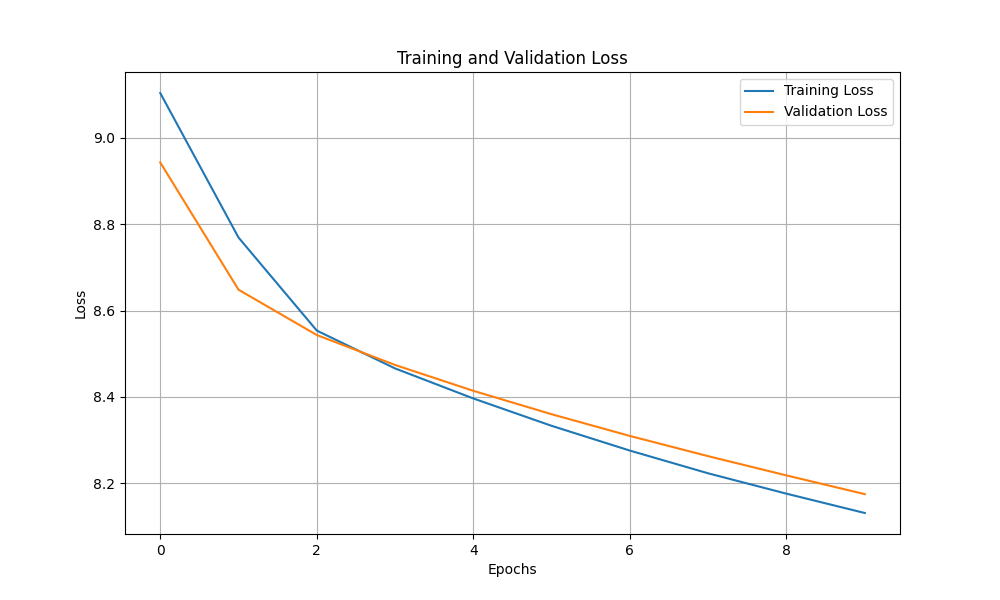

In [20]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_loss_list, label='Training Loss')
plt.plot(validation_loss_list, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
import torch
# Fetch one batch from the test_dataloader
for batch in test_dataloader:
    print(f"Batch structure: {type(batch)}")
    if isinstance(batch, (list, tuple)):
        print(f"Number of elements in the batch: {len(batch)}")
    # Optionally, print the shapes or types of the first few elements to understand their structure
    for i, item in enumerate(batch):
        if torch.is_tensor(item):
            print(f"Element {i} shape: {item.shape}")
        else:
            print(f"Element {i} is a {type(item)}")
    break  # Only inspect the first batch


Batch structure: <class 'numpy.ndarray'>
Element 0 is a <class 'numpy.ndarray'>
Element 1 is a <class 'numpy.ndarray'>
Element 2 is a <class 'numpy.ndarray'>
Element 3 is a <class 'numpy.ndarray'>
Element 4 is a <class 'numpy.ndarray'>
Element 5 is a <class 'numpy.ndarray'>
Element 6 is a <class 'numpy.ndarray'>
Element 7 is a <class 'numpy.ndarray'>
Element 8 is a <class 'numpy.ndarray'>
Element 9 is a <class 'numpy.ndarray'>
Element 10 is a <class 'numpy.ndarray'>
Element 11 is a <class 'numpy.ndarray'>
Element 12 is a <class 'numpy.ndarray'>
Element 13 is a <class 'numpy.ndarray'>
Element 14 is a <class 'numpy.ndarray'>
Element 15 is a <class 'numpy.ndarray'>
Element 16 is a <class 'numpy.ndarray'>
Element 17 is a <class 'numpy.ndarray'>
Element 18 is a <class 'numpy.ndarray'>
Element 19 is a <class 'numpy.ndarray'>
Element 20 is a <class 'numpy.ndarray'>
Element 21 is a <class 'numpy.ndarray'>
Element 22 is a <class 'numpy.ndarray'>
Element 23 is a <class 'numpy.ndarray'>
Element 2

In [22]:
def unnormalize_data(normalized_data, original_min, original_max, feature_range=(0, 1)):
    """
    Unnormalize data back to its original scale.
    
    Parameters:
    - normalized_data: The data to be unnormalized.
    - original_min: The minimum value of the original data before normalization.
    - original_max: The maximum value of the original data before normalization.
    - feature_range: The range to which the data was normalized.
    
    Returns:
    - unnormalized_data: Data converted back to its original scale.
    """
    min_val, max_val = feature_range
    # Reverse the scaling
    scaled_data = (normalized_data - min_val) / (max_val - min_val)
    # Reverse the normalization
    unnormalized_data = scaled_data * (original_max - original_min) + original_min
    return unnormalized_data


In [23]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [24]:
def predict(model, input_sequence, max_length=15, SOS_token=10001, EOS_token=10002):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.eval()
    
    # Initialize the input with SOS_token. Note: You might need to adjust dimensions based on your model's requirements.
    y_input = torch.tensor([[SOS_token]], dtype=torch.long, device=device).unsqueeze(0)  # Add batch dimension
    
    # Ensure input_sequence is properly shaped: [seq_len, batch_size, features]. You might need to adjust this.
    # Since your input_sequence is already provided in examples, ensure it's in the correct shape.
    # input_sequence = input_sequence.unsqueeze(0)  # Uncomment if your input_sequence lacks batch dimension
    
    predictions = []
    
    for _ in range(max_length):
        tgt_mask = model.get_tgt_mask(y_input.size(0)).to(device)
        
        # The model call might need adjustment based on its definition
        pred = model(input_sequence, y_input, tgt_mask=tgt_mask)
        
        # Assuming pred is [seq_len, batch_size, features]; features is your vocabulary size here
        next_item = pred.topk(1)[1][-1, :, :].squeeze().item()  # Take the last time step's top prediction
        
        # Check for EOS token and break if found
        if next_item == EOS_token:
            break
        
        predictions.append(next_item)
        
        # Update y_input with the predicted next item for the next iteration
        y_input = torch.cat((y_input, torch.tensor([[next_item]], dtype=torch.long, device=device).unsqueeze(0)), dim=0)
    
    return predictions




In [25]:
batch[0]

array([[10001,  1917,  3637,     3,     6,     4,     6,  9997,  1463,
        10002],
       [10001,  1944,  3672,     3,     6,     4,     6,  9997,  1487,
        10002]])

In [27]:
# Test the predict function with your examples
examples = [
    torch.tensor([[10001,  1917,  3637,     3,     6,     4,     6,  9997,  1463, 10002]], dtype=torch.long, device=device),
]

for idx, example in enumerate(examples):
    result = tf.predict(model, example, max_length=15,SOS_token=10001, EOS_token=10002)
    print(f"Example {idx}")
    print(f"Input: {example[0, 1:-1].tolist()}")  # Exclude SOS and EOS tokens for the input display
    print(f"Continuation: {result[1:-1]}")  # Exclude the SOS and EOS token from the continuation display
    print()

Initial device: cpu
Initial y_input: tensor([[10001]])
Target mask shape at step 0: torch.Size([1, 1])
Predicted next item at step 0: 10002
Updated y_input at step 0: tensor([[10001, 10002]])
EOS token encountered at step 0. Ending prediction.
Final output: [10001, 10002]
Example 0
Input: [1917, 3637, 3, 6, 4, 6, 9997, 1463]
Continuation: []

